In [12]:
from numpy import *
import matplotlib.pyplot as plt

In [13]:
def sigmoid(inX):
    return 1.0/(1 + exp(-inX))

In [31]:
def trainLogReg(xtrain, ytrain, param):
    numSample, numFeature = shape(xtrain)
    alpha = params['alpha']
    maxIter = params['maxIter']
    weights = ones((numFeature, 1))
    
    for i in range(maxIter):
        if param['optimizeType'] == 'gradDescent': #gradient descent
            output = sigmoid(xtrain * weights)
            error = ytrain - output
            weights = weights + alpha * xtrain.transpose() * error
        elif param['optimizeType'] == 'stocGradDescent': #stochastic gradient descent
            for j in range(numSample):
                output = sigmoid(xtrain[j,:] * weights)
                error = ytrain[j, 0] - output
                weights = weights + alpha * xtrain[j, :].transpose() * error
        elif param['optimizeType'] == 'smoothStocGradDescent': #smooth stochastic gradient descent
            dataIndex = range(numSample)
            for j in range(numSample):
                alpha = 40/(1.0 + i + j) + 0.2
                randIndex = int(random.uniform(0, len(dataIndex)))
                output = sigmoid(xtrain[randIndex, :] * weights)
                error = ytrain[randIndex, 0] - output
                weights = weights + alpha * xtrain[randIndex,:].transpose() * error
                del(dataIndex[randIndex]) #after one iteration, delete the sample
        else:
            raise NameError('Optimize type not valid!')
            
    return weights

In [15]:
def testLogReg(weights, xtest, ytest):
    numSample, numFeature = shape(xtest)
    correct = 0
    for i in xrange(numSample):
        predict = sigmoid(xtest[i,:] * weights)[0, 0] > 0.5
        if predict == ytest[i, 0]:
            correct += 1
    accuracy = float(correct) / numSample
    return accuracy

In [16]:
def plotLogReg(weights, xtrain, ytrain):
    numSample, numFeature = shape(xtrain)
    #only works for 2D array
    #draw all dots
    for i in range(numSample):
        if (ytrain[i] == 0):
            plt.plot(xtrain[i, 1], xtrain[i, 2], 'or')
        elif (ytrain[i] == 1):
            plt.plot(xtrain[i, 1], xtrain[i, 2], 'ob')
            
    min_x = min(xtrain[:, 1])[0, 0]
    max_x = max(xtrain[:, 1])[0, 0]
    weights = weights.getA() #convert mat to array
    y_min = float(-weights[0] - weights[1] * min_x) / weights[2]
    y_max = float(-weights[0] - weights[1] * max_x) / weights[2]
    plt.plot([min_x, max_x], [y_min, y_max], '-g')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Loading data...
Train the model...
Test the model...
Accuracy =  0.823529411765
Make plots...
(0.24299999999999999, 0.77400000000000002, array([ 0.11027257]), array([ 0.12546036]))


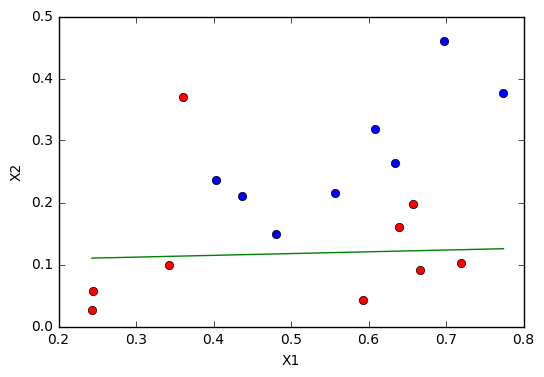

In [36]:
#Load data
print "Loading data..."
xtrain = []
ytrain = []
readFile = open('watermellon.txt')
for row in readFile.readlines():
    rowArray = row.strip().split()
    xtrain.append([1.0, float(rowArray[0]), float(rowArray[1])])
    ytrain.append(float(rowArray[2]))

trainx = mat(xtrain)
trainy = mat(ytrain).transpose()

testx = trainx
testy = trainy

print "Train the model..."
params = {'alpha': 0.01, 'maxIter': 80, 'optimizeType': 'smoothStocGradDescent'}
trainedWeights = trainLogReg(trainx, trainy, params)


print "Test the model..."
accuracy = testLogReg(trainedWeights, testx, testy)
print "Accuracy = ", accuracy

print "Make plots..."
plotLogReg(trainedWeights, trainx, trainy)
